In [1]:
%load_ext autoreload
%autoreload 2
%cd '/home/xingyu/Projects/PlasticineLab'
%pwd


from chester.plotting.cplot import *
from chester.plotting.cplot import *
data_paths = ['data/autobot/0827_td3']

exps_data, plottable_keys, distinct_params = reload_data(data_paths)

/home/xingyu/Projects/PlasticineLab
['data/autobot/0827_td3']
finished walking exp folders
Reading data/autobot/0827_td3/progress.csv
[Errno 2] No such file or directory: 'data/autobot/0827_td3/progress.csv'
Reading data/autobot/0827_td3/0827_td3/progress.csv
[Errno 2] No such file or directory: 'data/autobot/0827_td3/0827_td3/progress.csv'
Reading data/autobot/0827_td3/0827_td3/0827_td3_2021_08_30_22_23_48_0005/progress.csv
Reading data/autobot/0827_td3/0827_td3/0827_td3_2021_08_30_22_23_48_0001/progress.csv
Reading data/autobot/0827_td3/0827_td3/0827_td3_2021_08_30_22_23_48_0017/progress.csv
[Errno 2] No such file or directory: 'data/autobot/0827_td3/0827_td3/0827_td3_2021_08_30_22_23_48_0017/progress.csv'
Reading data/autobot/0827_td3/0827_td3/0827_td3_2021_08_30_22_23_48_0002/progress.csv
Reading data/autobot/0827_td3/0827_td3/0827_td3_2021_08_30_22_23_48_0010/progress.csv
Reading data/autobot/0827_td3/0827_td3/0827_td3_2021_08_30_22_23_48_0008/progress.csv
Reading data/autobot/082

here
roll only [0.05625193989059577, 0.07591478992253542, 0.05772685604946067, 0.18499078679208955] [0.00920205 0.00308583 0.0033124  0.14043753]
push only [0.06330266307728986, 0.06911670428235084, 0.06823425740003586, 0.07940801978111267] [0.01522727 0.00289354 0.00196409 0.01118649]


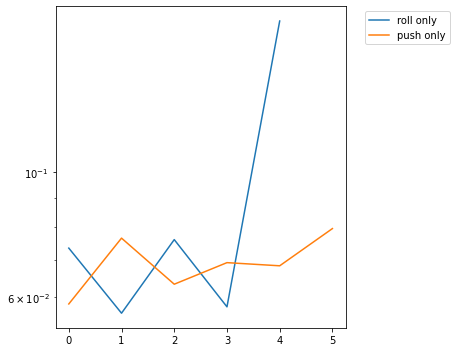

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

def custom_series_splitter(x):
    params = x['flat_params']

    emd_downsample_num = params['emd_downsample_num']
    action_mask = params['action_mask']
    if emd_downsample_num != 1000:
        return 'filtered'
    if action_mask[0] ==0 and action_mask[1] == 1:
        return 'roll only'
    if action_mask[0] ==1 and action_mask[1] == 0:
        return 'push only'
    if action_mask[0] ==1 and action_mask[1] == 1:
        return 'filtered'

group_selectors, group_legends = get_group_selectors(exps_data, custom_series_splitter)
print('here')

keys = ['eval/final_emd']
fig = plt.figure(figsize=(5,5))
for idx, (selector, legend) in enumerate(zip(group_selectors, group_legends)):
    if legend == 'filtered':
        continue
    for key in keys:
        y, y_lower, y_upper = get_shaded_curve(selector, key)
        print(legend, y[-4:], np.array(y_upper[-4:]) - np.array(y[-4:]))
        plt.plot(list(range(len(y))), y, label=legend)
# plt.ylim(0, 0.05)
plt.yscale('log')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('./data/plots/0827_td3.png', bbox_inches="tight")
plt.show()